In [5]:
!pip install caer canaro

  Using cached caer-1.9.8-py3-none-any.whl (838 kB)
  Using cached canaro-1.1.0-py3-none-any.whl (19 kB)
     |████████████████████████████████| 21.5 MB 10.3 MB/s eta 0:00:01     |██████████████████████████████▋ | 20.6 MB 10.3 MB/s eta 0:00:01
     |████████████████████████████████| 56.1 MB 43.6 MB/s eta 0:00:01
     |████████████████████████████████| 454.3 MB 14 kB/s s eta 0:00:01    |██████▍                         | 91.4 MB 46.2 MB/s eta 0:00:08     |██████████████▋                 | 207.4 MB 53.2 MB/s eta 0:00:05     |█████████████████▋              | 249.5 MB 51.8 MB/s eta 0:00:04
     |████████████████████████████████| 6.0 MB 42.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 52.2 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 45.7 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 51.3 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 49.5 MB/s eta 0:00:01
  Attempting uninstall: grpcio
    Found existing installation

In [6]:
import os
import caer
import canaro
import numpy as np
import gc
import cv2 as cv

In [7]:
img_size = (80,80)  # images should be of same size
channels = 1       # 1-> grayscale image
char_path = r'../input/the-simpsons-characters-dataset/simpsons_dataset'

In [8]:
# we will go through all the files and store the no. of images in each file in a dictionary and sort 
# it in decreasing order and grab the top 10 elements of the dictionary

In [9]:
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path,char)))
    
# sorting dictionary in descending order
char_dict = caer.sort_dict(char_dict,descending = True)
char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('simpsons_dataset', 42),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 (

In [10]:
# grabbing first 10 names from the dictionary and storing it in a list

In [11]:
characters = []
count = 0
for i in char_dict:
    characters.append(i[0])
    count+=1
    if count>=10:
        break
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

In [12]:
# creating the training data

In [13]:
train = caer.preprocess_from_dir(char_path,characters,channels=channels,IMG_SIZE=img_size,isShuffle=True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
1 - homer_simpson
2 - homer_simpson
3 - homer_simpson
4 - homer_simpson
5 - homer_simpson
6 - homer_simpson
7 - homer_simpson
8 - homer_simpson
9 - homer_simpson
10 - homer_simpson
11 - homer_simpson
12 - homer_simpson
13 - homer_simpson
14 - homer_simpson
15 - homer_simpson
16 - homer_simpson
17 - homer_simpson
18 - homer_simpson
19 - homer_simpson
20 - homer_simpson
21 - homer_simpson
22 - homer_simpson
23 - homer_simpson
24 - homer_simpson
25 - homer_simpson
26 - homer_simpson
27 - homer_simpson
28 - homer_simpson
29 - homer_simpson
30 - homer_simpson
31 - homer_simpson
32 - homer_simpson
33 - homer_simpson
34 - homer_simpson
35 - homer_simpson
36 - homer_simpson
37 - homer_simpson
38 - homer_simpson
39 - homer_simpson
40 - homer_simpson
41 - homer_simpson
42 - homer_simpson
43 - homer_simpson
44 - homer_simpson
45 - homer_simpson
46 - homer_simpson
47 - homer_simps

/opt/conda/lib/python3.7/site-packages/caer/core.py:72: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(obj, dtype=dtype, order=order)


In [14]:
len(train)

13811

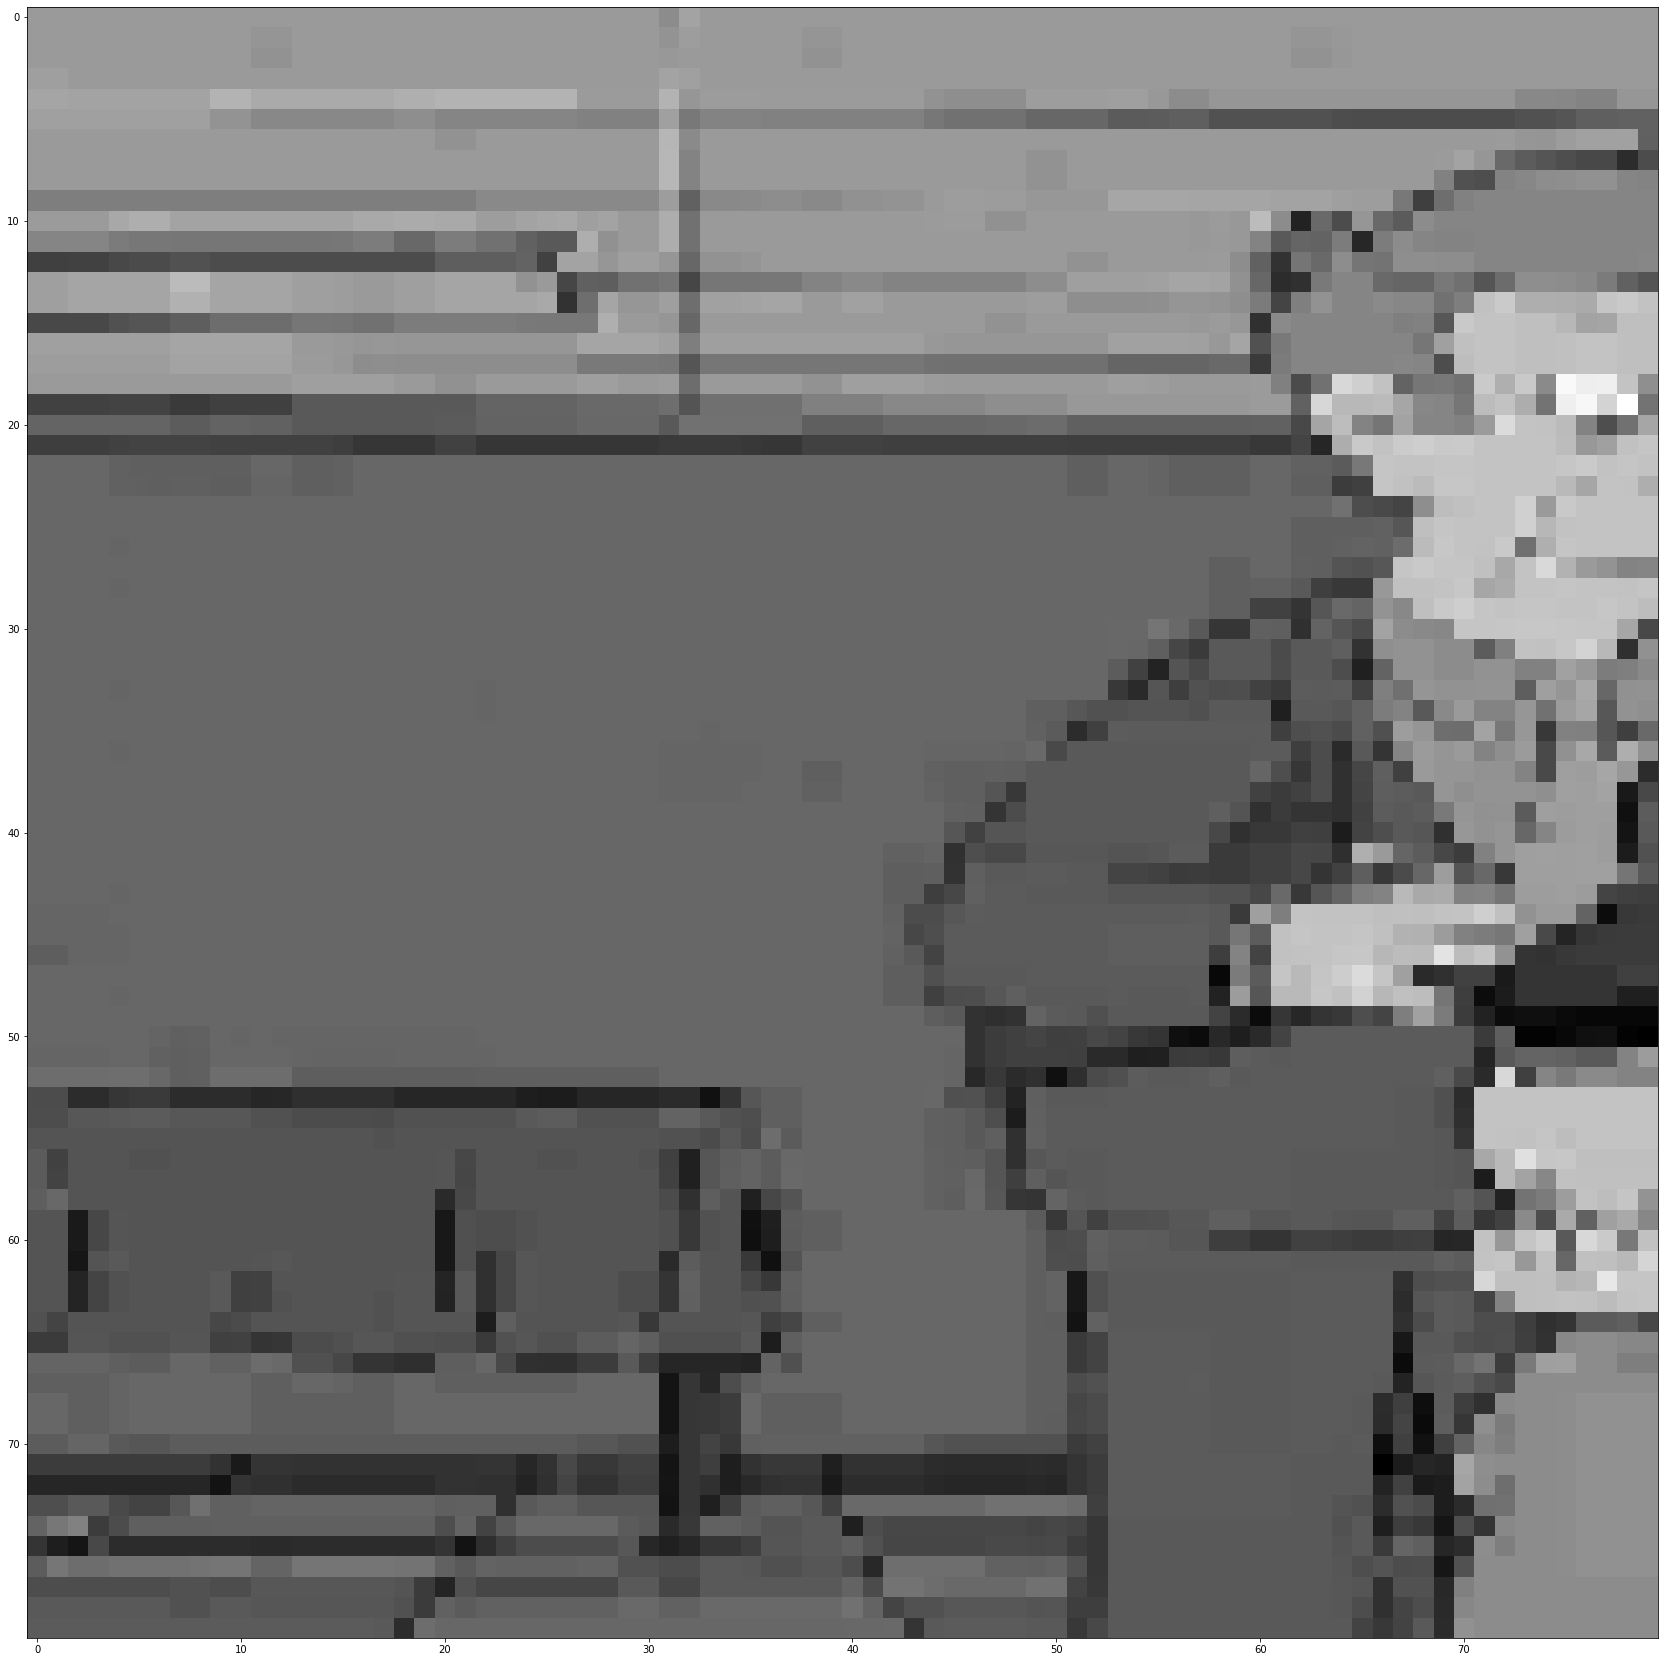

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plt.imshow(train[0][0],cmap='gray')
plt.show()

In [16]:
# separating features and labels

In [17]:
featureSet , label = caer.sep_train(train,IMG_SIZE=img_size)

In [18]:
# normalizing the featureSet in range of (0,1)

In [19]:
from tensorflow.keras.utils import to_categorical
featureSet = caer.normalize(featureSet)
label = to_categorical(label,len(characters))

In [20]:
# creating training and validation data

In [21]:
x_train, x_val, y_train, y_val = caer.train_val_split(featureSet, label, val_ratio=0.2)
x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)

In [22]:
# deleting variables that are no longer of use

In [23]:
del train
del featureSet
del label
gc.collect()

3326

In [24]:
# image data generator
# this is basically an image generator that will synthesize new images from already existing images to
# help introduce some randomness in our network and make it perform better

In [25]:
BATCH_SIZE = 32
EPOCHS = 10

In [26]:
datagen = canaro.generators.imageDataGenerator()
train_gen = datagen.flow(x_train,y_train, batch_size=BATCH_SIZE)

In [27]:
# creating the model

In [28]:
model = canaro.models.createSimpsonsModel(IMG_SIZE=img_size,channels=channels,output_dim=len(characters),
                                         loss='binary_crossentropy',decay=1e-6,learning_rate=0.001,
                                         momentum=0.9,nesterov=True)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 80, 80, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 78, 78, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 39, 39, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 18, 18, 64)       

In [30]:
# creating callbacks list
# callbacks list will contain something called learning rate schedule that will essentially schedule
# the learning rate at specific intervals so that our network can essentially train better

In [31]:
from tensorflow.keras.callbacks import LearningRateScheduler
callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]

In [32]:
# training the model

In [33]:
training = model.fit(train_gen,steps_per_epoch=len(x_train)//BATCH_SIZE,epochs=EPOCHS,
                     validation_data=(x_val,y_val),validation_steps=len(y_val)//BATCH_SIZE,
                    callbacks = callbacks_list)

Epoch 1/10
345/345 [==============================] - 483s 1s/step - loss: 0.3400 - accuracy: 0.1490 - val_loss: 0.3316 - val_accuracy: 0.1711
Epoch 2/10
345/345 [==============================] - 455s 1s/step - loss: 0.3236 - accuracy: 0.1578
Epoch 3/10
345/345 [==============================] - 463s 1s/step - loss: 0.3235 - accuracy: 0.1600
Epoch 4/10
345/345 [==============================] - 456s 1s/step - loss: 0.3232 - accuracy: 0.1598
Epoch 5/10
345/345 [==============================] - 465s 1s/step - loss: 0.3221 - accuracy: 0.1606
Epoch 6/10
345/345 [==============================] - 466s 1s/step - loss: 0.3148 - accuracy: 0.1946
Epoch 7/10
345/345 [==============================] - 476s 1s/step - loss: 0.3069 - accuracy: 0.2317
Epoch 8/10
345/345 [==============================] - 478s 1s/step - loss: 0.3032 - accuracy: 0.2481
Epoch 9/10
345/345 [==============================] - 478s 1s/step - loss: 0.3003 - accuracy: 0.2622
Epoch 10/10
345/345 [============================

In [34]:
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

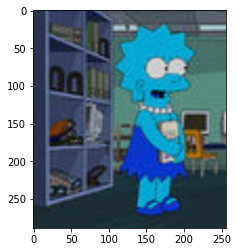

In [44]:
test_path = r'../input/the-simpsons-characters-dataset/simpsons_dataset/lisa_simpson/pic_0000.jpg'
img = cv.imread(test_path)
plt.imshow(img,cmap='gray')
plt.show()

In [45]:
def prepare(image):
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image = cv.resize(image, img_size)
    image = caer.reshape(image, img_size, 1)
    return image

In [46]:
predictions = model.predict(prepare(img))


In [47]:
print(characters[np.argmax(predictions[0])])

lisa_simpson
